# Project: Bank Marketing Campaign

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
n P
. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
.
Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012

The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required,
in order to access if the product (bank term deposit) would be (or not) subscribed.

## goal
The classification goal is to predict if the client will subscribe a term deposit (variable y).



In [52]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
>
### General Properties

In [53]:
# load and view datasets
df = pd.read_csv('bank-full.csv', sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [54]:
# view data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [55]:
# checking descriptive statistics
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [56]:
#view the number of unique values
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [57]:
#Convert the classification values in column y to a number to define relationships
df['y_num'] = df['y'].replace({'yes':1, 'no':0})
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [58]:
#Define between numeric variables and column y
df.corr().iloc[:-1,-1]

age         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
Name: y_num, dtype: float64

<a id='eda'></a>
## Exploratory Data Analysis

<AxesSubplot:xlabel='duration', ylabel='Count'>

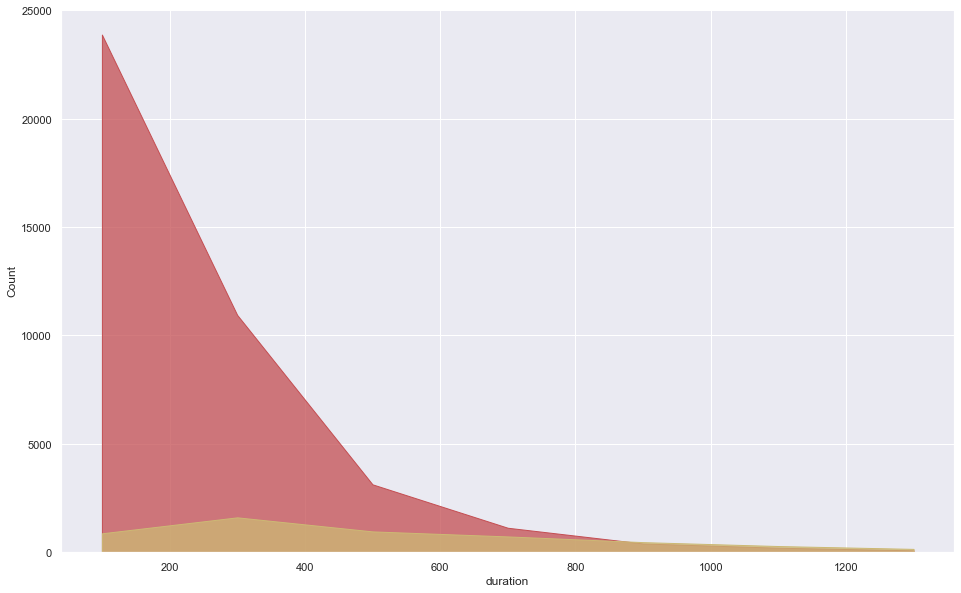

In [59]:
#Show the relationship between y and duration (last contact duration, in seconds (numeric))
fig = plt.figure(figsize=(16, 10))
sns.histplot(data=df, x=df.query('y_num==0').duration, bins=range(0,1600,200), color='r',element="poly")
sns.histplot(data=df, x=df.query('y_num==1').duration, bins=range(0,1600,200), color='y',element="poly")

<AxesSubplot:xlabel='pdays', ylabel='Count'>

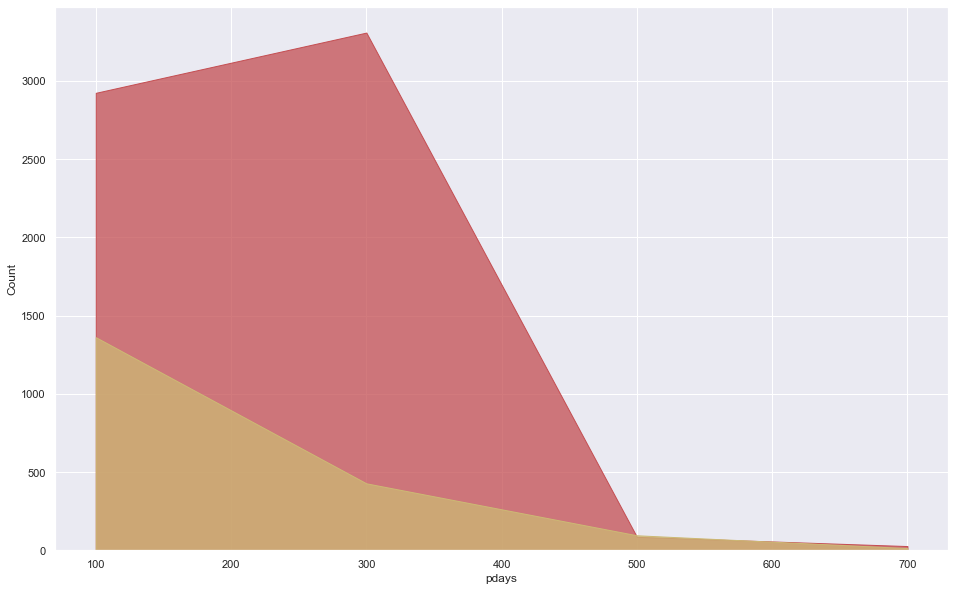

In [60]:
#Show the relationship between y and pdays
#(number of days that passed by after the client was last contacted from a previous campaign)
fig = plt.figure(figsize=(16, 10))
sns.histplot(data=df, x=df.query('y_num==0').pdays, bins=range(0,1000,200), color='r',element="poly")
sns.histplot(data=df, x=df.query('y_num==1').pdays, bins=range(0,1000,200), color='y',element="poly")

<AxesSubplot:xlabel='balance', ylabel='Count'>

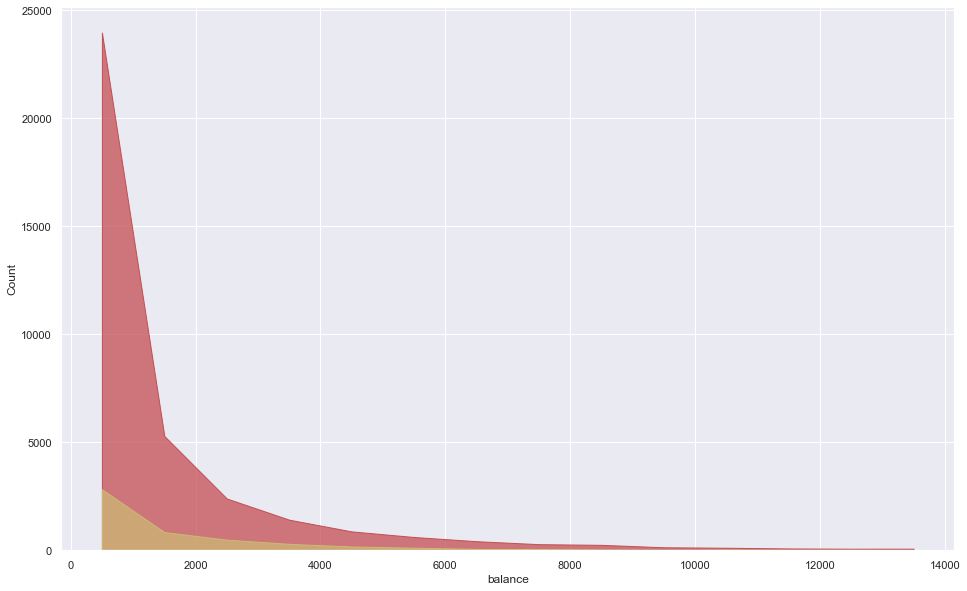

In [61]:
#Show the relationship between y and balance
fig = plt.figure(figsize=(16, 10))
sns.histplot(data=df, x=df.query('y_num==0').balance, bins=range(0,15000,1000), color='r',element="poly")
sns.histplot(data=df, x=df.query('y_num==1').balance, bins=range(0,15000,1000), color='y',element="poly")

<AxesSubplot:xlabel='day', ylabel='Count'>

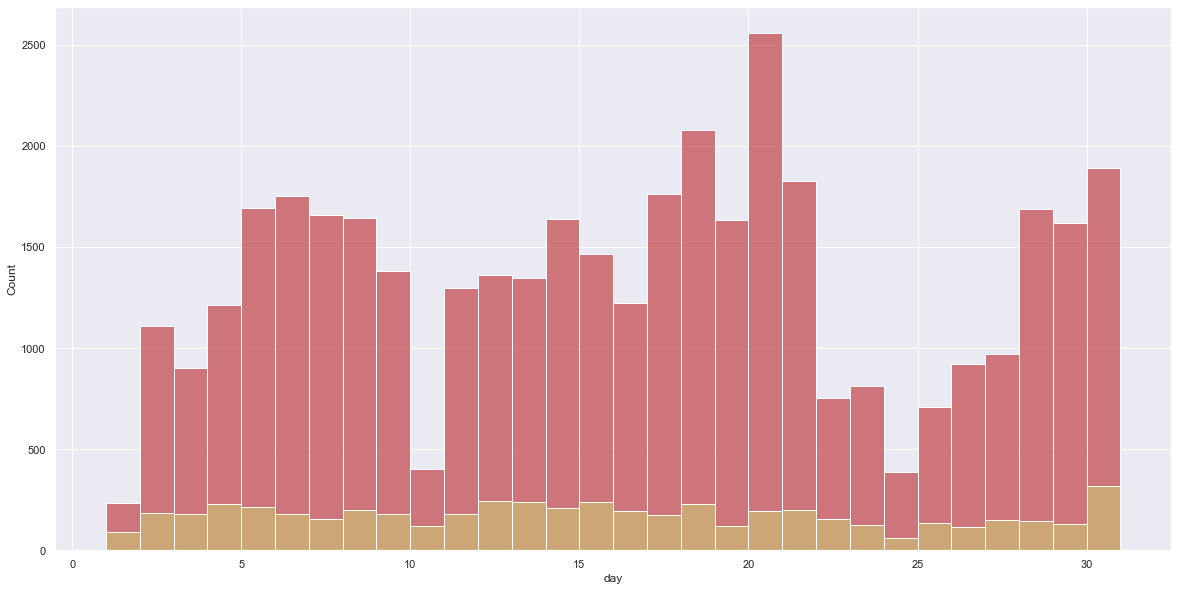

In [62]:
#Show the relationship between y and day
fig = plt.figure(figsize=(20, 10))
sns.histplot(data=df, x=df.query('y_num==0').day, bins=range(1,32,1), color='r')
sns.histplot(data=df, x=df.query('y_num==1').day, bins=range(1,32,1), color='y')

<AxesSubplot:xlabel='previous', ylabel='Count'>

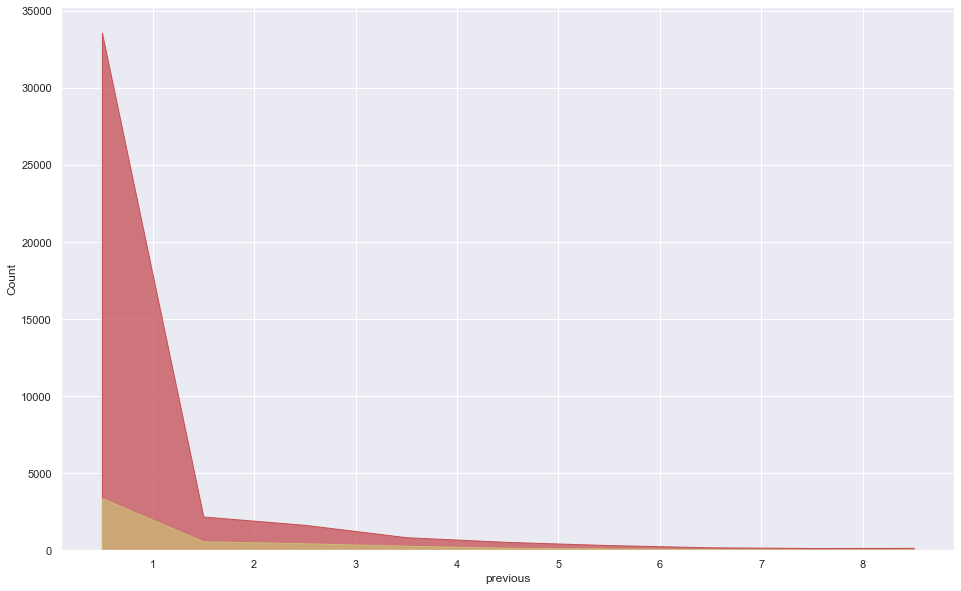

In [63]:
#Show the relationship between y and previous (number of contacts performed before this campaign and for this client)
fig = plt.figure(figsize=(16, 10))
sns.histplot(data=df, x=df.query('y_num==0').previous, bins=range(0,10), color='r',element="poly")
sns.histplot(data=df, x=df.query('y_num==1').previous, bins=range(0,10), color='y',element="poly")

<AxesSubplot:xlabel='campaign', ylabel='Count'>

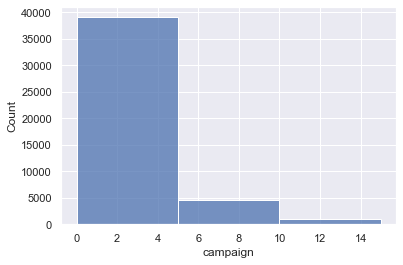

In [64]:
sns.histplot(data=df, x=df.campaign, bins=[0,5,10,15])

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>,
        <AxesSubplot:title={'center':'y_num'}>, <AxesSubplot:>]],
      dtype=object)

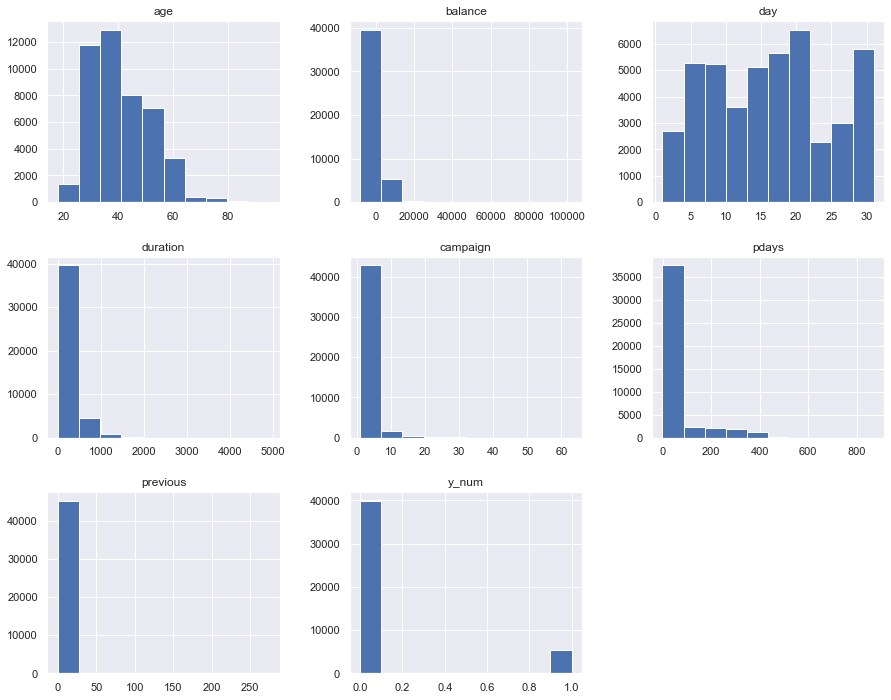

In [65]:
df.hist(figsize=(15,12))

<AxesSubplot:xlabel='marital'>

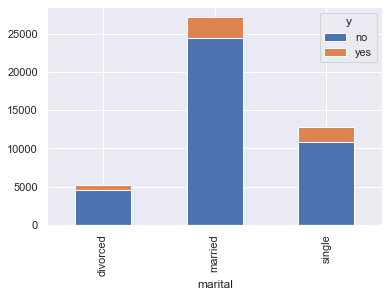

In [66]:
df.groupby(['marital', 'y']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='age'>

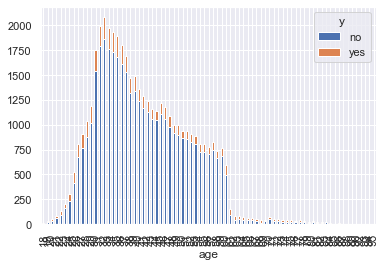

In [67]:
df.groupby(['age', 'y']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='job'>

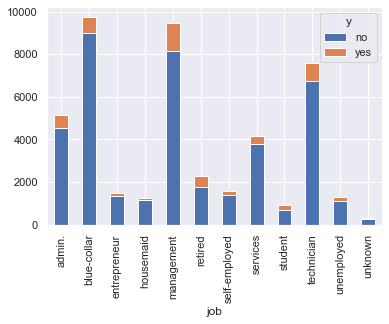

In [68]:
df.groupby(['job', 'y']).size().unstack().plot(kind='bar', stacked=True)

In [69]:
print(len(df.query('y=="yes"')), len(df.query('y=="no"')))
print(len(df.query('y=="yes"'))/ len(df.query('y=="no"')))
#df.query('count(y=="no")/count(y=="yes")')

5289 39922
0.1324833425179099


<AxesSubplot:xlabel='education'>

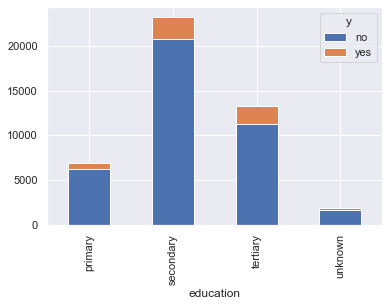

In [70]:
df.groupby(['education', 'y']).size().unstack().plot(kind='bar', stacked=True)

<AxesSubplot:xlabel='month'>

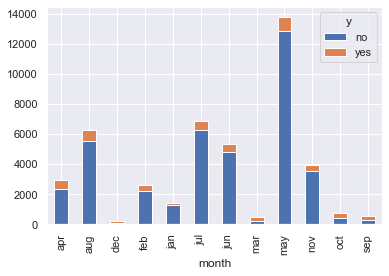

In [71]:
df.groupby(['month', 'y']).size().unstack().plot(kind='bar', stacked=True)

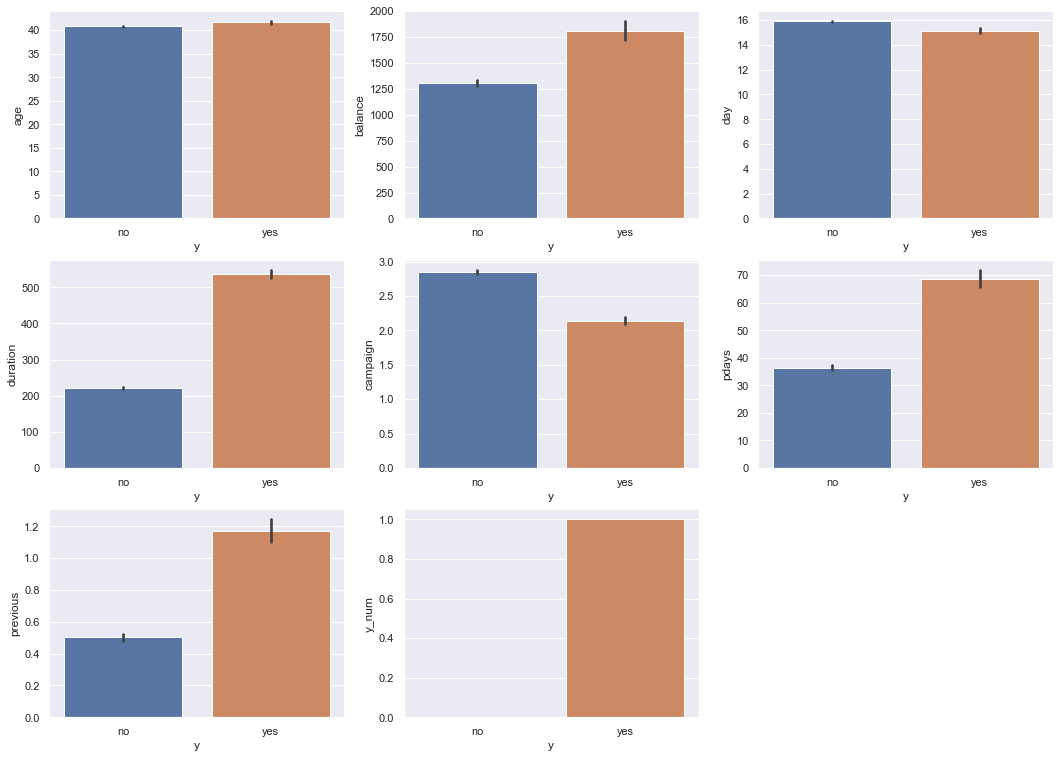

In [72]:
describe_col = df.describe().columns
sns.set()
fig = plt.figure(figsize=(18, 13))
for i in range(1,len(describe_col)+1):
    plt.subplot(3,3,i)
    sns.barplot(y=df[describe_col[i-1]], x=df['y'], data=df)
plt.show()

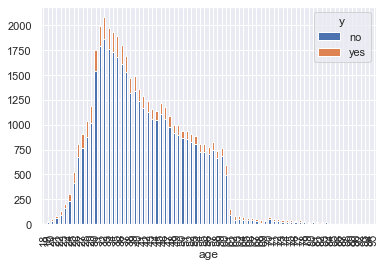

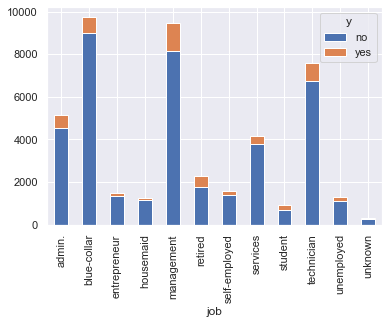

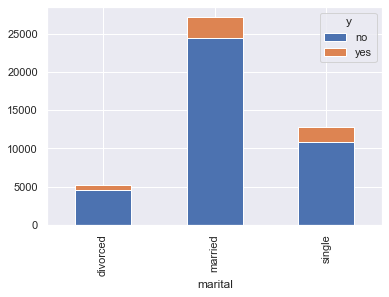

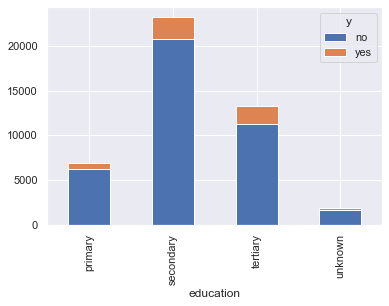

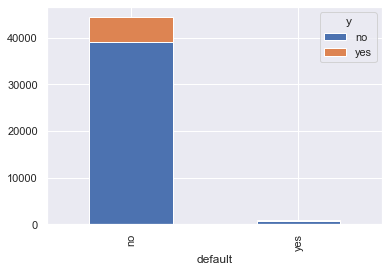

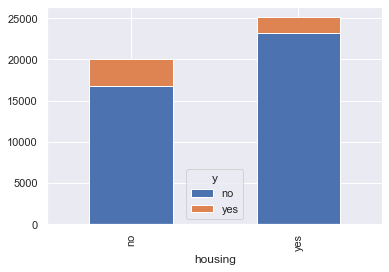

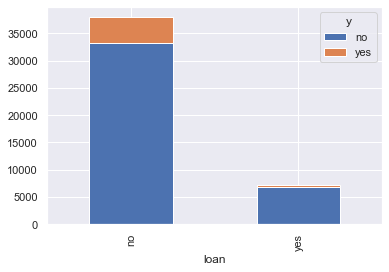

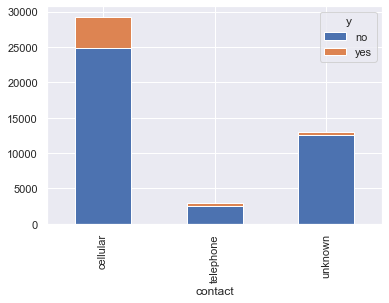

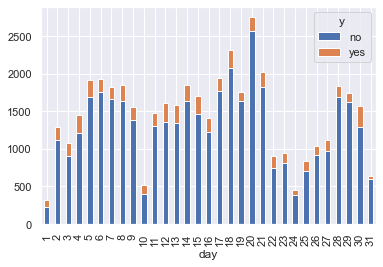

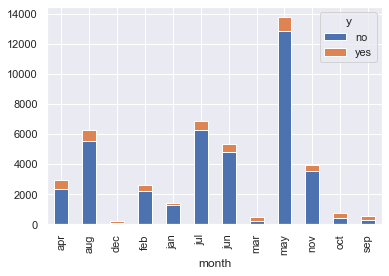

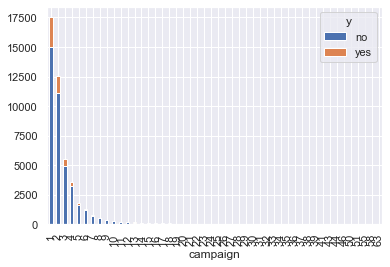

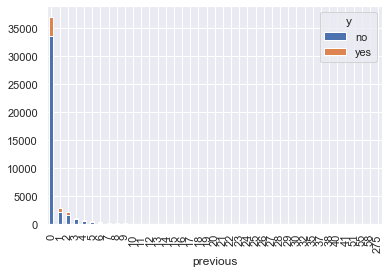

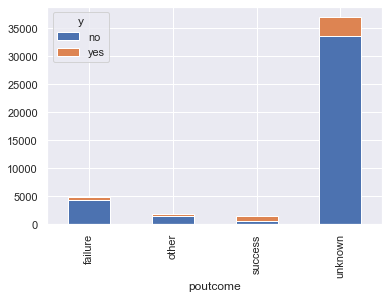

In [73]:
for i in ['age', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign',
       'previous', 'poutcome']:
    df.groupby([i, 'y']).size().unstack().plot(kind='bar', stacked=True)

In [74]:
job_piv = pd.pivot_table(df, values='education', index='contact', columns='y', aggfunc=np.size, margins=True)
job_piv['p'] = (job_piv['yes'] / job_piv['All'])
g = job_piv.sort_values('p', ascending=False)
g.iloc[:,-1]

contact
cellular     0.149189
telephone    0.134205
All          0.116985
unknown      0.040707
Name: p, dtype: float64

In [75]:
for s in [ 'job', 'marital', 'education', 'default', 'balance', 'housing','loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays','previous', 'poutcome']:
    job_piv = pd.pivot_table(df, values='age', index=s, columns='y', aggfunc=np.size, margins=True)
    job_piv['p'] = (job_piv['yes'] / job_piv['All'])
    g = job_piv.sort_values('p', ascending=False)
    o = g.iloc[:,-1]
    print(o[o > 0.15], "\n")

job
student       0.286780
retired       0.227915
unemployed    0.155027
Name: p, dtype: float64 

Series([], Name: p, dtype: float64) 

education
tertiary    0.150064
Name: p, dtype: float64 

Series([], Name: p, dtype: float64) 

balance
-3058    1.000000
 6013    1.000000
 2112    1.000000
 5773    1.000000
 5806    1.000000
           ...   
 695     0.153846
-7       0.153846
 639     0.153846
 698     0.153846
 1559    0.153846
Name: p, Length: 1727, dtype: float64 

housing
no    0.167024
Name: p, dtype: float64 

Series([], Name: p, dtype: float64) 

Series([], Name: p, dtype: float64) 

day
1     0.279503
10    0.230916
30    0.173052
22    0.170166
3     0.164968
4     0.159170
25    0.158333
12    0.152215
13    0.152050
Name: p, dtype: float64 

month
mar    0.519916
dec    0.467290
sep    0.464594
oct    0.437669
apr    0.196794
feb    0.166478
Name: p, dtype: float64 

duration
1248    1.000000
1345    1.000000
1347    1.000000
1153    1.000000
1348    1.000000
          

<a id='conclusions'></a>
## Conclusions


Based on previous analyses, we do not see a variable (column) that has a very strong impact on the overall goal of the project (The classification goal is to predict if the client will subscribe a term deposit (variable y).
However, we found some variables that have some effect, and if we target them, it will improve the subscription rate of term deposits.
 >1- Day: We found some days the percentage of customers who subscribed to term deposits is greater than the rest of the days, such as a day (1 = 28% - 10 = 23% - 30 = 17%).
 
 >2- Job: Students are the most underwritten clients, with a rate of 29%.
 
 >3- Education: tertiary education recorded the highest number of customers who subscribed to time deposits by 15%.

>4- The month: We found in some months the percentage of customers who subscribed to term deposits is greater than the rest of the days, such as (March = 52% - December = 47% - September = 46%)

>5 - poutcome: The results of previous successful marketing campaigns have the most impact on customers who subscribe to term deposits by 65%.